MPG : Miles per Gallon

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']

In [ ]:
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/auto-mpg.data',
                          names = columns, sep = ' ', skipinitialspace = True, na_values = '?', comment = '\t')


In [ ]:
raw_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
raw_dataset.shape

(398, 8)

In [ ]:
raw_dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
raw_dataset['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
np.round(raw_dataset['horsepower'].mean())

104.0

**Missing Values**

In [ ]:
#replace by mean : if data to be replaced is continuous
#replace by median: if data to be displayed is discrete
raw_dataset['horsepower'].replace(np.nan, np.round(raw_dataset['horsepower'].mean()), inplace = True)

In [ ]:
raw_dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
origin = pd.get_dummies(raw_dataset['origin'])

In [ ]:
origin

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [ ]:
# concatenate multiple dataframes
mpg_df = pd.concat([raw_dataset, origin], axis = 1)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,1,0,0


In [ ]:
mpg_df.drop(['origin'], axis = 1, inplace=True)

In [ ]:
mpg_df.rename({ 1 : 'USA', 2 : 'Europe', 3 : 'Japan'}, axis = 1, inplace=True)
mpg_df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


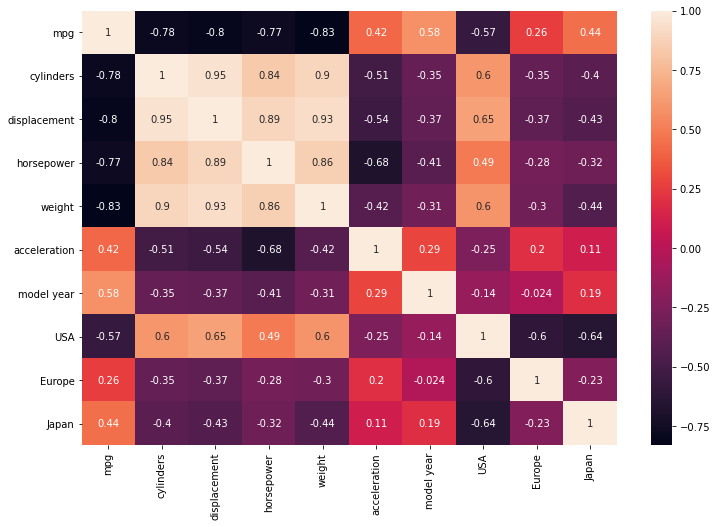

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(mpg_df.corr(), annot = True)


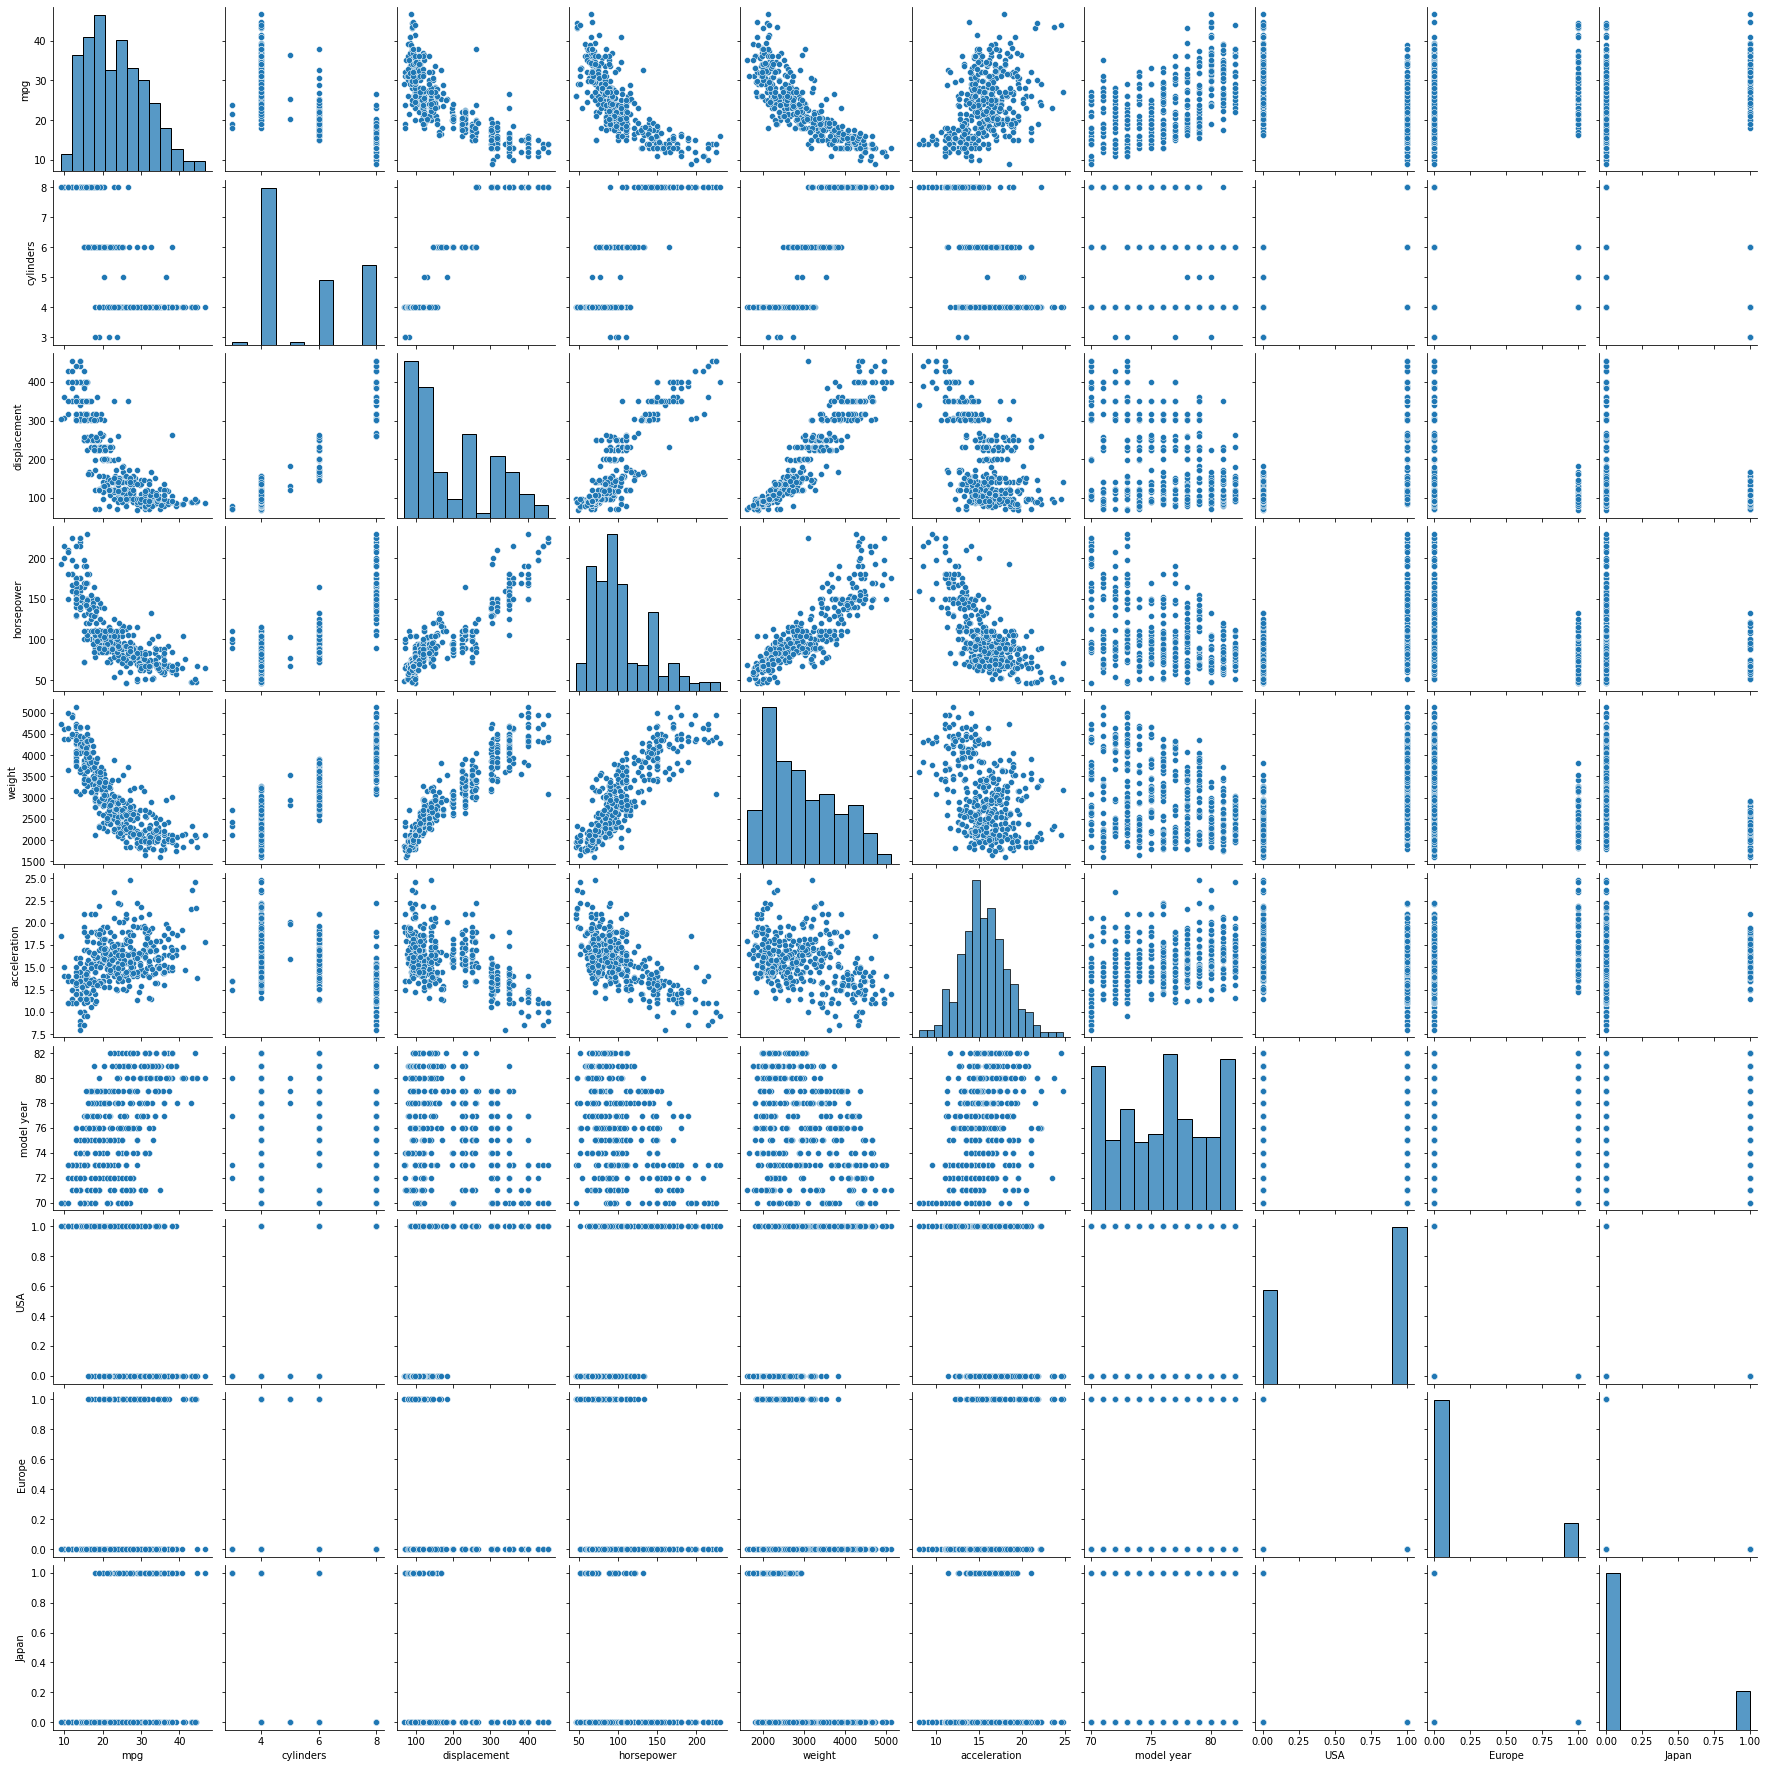

In [ ]:
sns.pairplot(data = mpg_df)

In [ ]:
X = mpg_df.drop('mpg', axis = 1)
Y = mpg_df['mpg']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler_X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y, test_size = 0.2, random_state = 9)


**ANN Regression**

In [ ]:
# Dense Layer in NN
from keras.layers import Dense
# Feedforeward NN
from keras.models import Sequential
# model optimizers
from keras.optimizers import RMSprop


In [ ]:
def build_model():
  model = Sequential()
  # Input Layer
  model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units = 128, activation='relu'))
  # Hidden Layer - II
  model.add(Dense(units = 128, activation='relu'))
  # Output Layer
  model.add(Dense(units = 1))
  # Optimizers - RMSProp
  # alpha or learning rate = 0.0001
  optimizers = RMSprop(learning_rate= 0.0001)
  # For Regression , loss function - 'mean_squared_error'
  model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error', 'mean_absolute_error'])
  return model
model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 25,601
Trainable params: 25,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# epochs = no. of iterations
# batch_size =
# validation_split = 15% of overall training samples to validate algorithm parallely just to avoid overfitting
history = model.fit(X_train, Y_train, epochs = 400, batch_size = 25, validation_split=0.15)


Epoch 1/400
11/11 [==============================] - 0s 17ms/step - loss: 606.8816 - mean_squared_error: 606.8816 - mean_absolute_error: 23.3863 - val_loss: 664.5245 - val_mean_squared_error: 664.5245 - val_mean_absolute_error: 24.6709
Epoch 2/400
11/11 [==============================] - 0s 3ms/step - loss: 600.0810 - mean_squared_error: 600.0811 - mean_absolute_error: 23.2349 - val_loss: 658.4302 - val_mean_squared_error: 658.4302 - val_mean_absolute_error: 24.5435
Epoch 3/400
11/11 [==============================] - 0s 3ms/step - loss: 594.0776 - mean_squared_error: 594.0776 - mean_absolute_error: 23.1032 - val_loss: 652.1337 - val_mean_squared_error: 652.1337 - val_mean_absolute_error: 24.4110
Epoch 4/400
11/11 [==============================] - 0s 3ms/step - loss: 587.8066 - mean_squared_error: 587.8066 - mean_absolute_error: 22.9623 - val_loss: 645.4077 - val_mean_squared_error: 645.4077 - val_mean_absolute_error: 24.2684
Epoch 5/400
11/11 [==============================] - 0s 3ms

In [ ]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,606.881592,606.881592,23.386295,664.524475,664.524475,24.670921
1,600.080994,600.081055,23.234932,658.430237,658.430237,24.543488
2,594.077637,594.077637,23.103182,652.133728,652.133728,24.411026
3,587.806641,587.806641,22.962278,645.407715,645.407715,24.268438
4,581.056274,581.056274,22.808802,638.155090,638.155151,24.113699
...,...,...,...,...,...,...
395,6.806465,6.806465,1.901778,5.362827,5.362827,1.819292
396,6.816201,6.816201,1.892333,5.365805,5.365805,1.832401
397,6.764756,6.764756,1.888825,5.375280,5.375280,1.864416
398,6.791648,6.791648,1.892251,5.406256,5.406256,1.887712


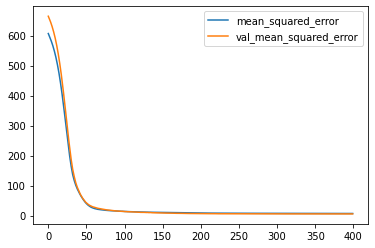

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error',	'val_mean_squared_error']].plot()

In [ ]:
model.evaluate(X_test, Y_test)
prediction = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step - loss: 7.2893 - mean_squared_error: 7.2893 - mean_absolute_error: 1.9265


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, prediction)


0.8887204317482279

In [ ]:
X_new = [[8,	357.0,	165.0,	3904.0,	12.0,	70,	1,	0,	0]]
scaler_X_new = scaler.transform(X_new)
np.round(model.predict(scaler_X_new))


array([[14.]], dtype=float32)